# Fill That Cart!

# Introduction

Instacart is a grocery delivery platform where customers can place an order and have it delivered, similar to Uber Eats and DoorDash.  
The objective of this project is to understand and bring insights about customer behavior.

## Data Dictionary

- `instacart_orders.csv`: each row corresponds to an order in the Instacart application.
    - `'order_id'`: unique ID number that identifies each order.
    - `'user_id'`: unique ID number that identifies each customer's account.
    - `'order_number'`: the number of times this customer has placed an order.
    - `'order_dow'`: day of the week the order was placed (0 if Sunday).
    - `'order_hour_of_day'`: time of day the order was placed.
    - `'days_since_prior_order'`: number of days since this customer placed their previous order.
- `products.csv`: each row corresponds to a unique product that customers can purchase.
    - `'product_id'`: unique ID number that identifies each product.
    - `'product_name'`: name of the product.
    - `'aisle_id'`: unique ID number that identifies each grocery aisle category.
    - `'department_id'`: unique ID number that identifies each grocery department.
- `order_products.csv`: each row corresponds to an item ordered in a purchase.
    - `'order_id'`: unique ID number that identifies each order.
    - `'product_id'`: unique ID number that identifies each product.
    - `'add_to_cart_order'`: the sequential order in which each item was added to the cart.
    - `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have.
- `aisles.csv`
    - `'aisle_id'`: unique ID number that identifies each grocery aisle category.
    - `'aisle'`: name of the aisle.
- `departments.csv`
    - `'department_id'`: unique ID number that identifies each grocery department.
    - `'department'`: name of the department.


# Step 1. Data Description

In [1]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# read datasets into DataFrames
df_orders = pd.read_csv('instacart_orders.csv', sep=';')
df_products = pd.read_csv('products.csv', sep=';')
df_aisles = pd.read_csv('aisles.csv', sep=';')
df_departments = pd.read_csv('departments.csv', sep=';')
df_order_products = pd.read_csv('order_products.csv', sep=';')

In [3]:
# show information from the DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# show information from the DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# show information from the DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# show information from the DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [7]:
# show information from the DataFrame
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Observations

The data was received in .csv files, the separator ";" was established as a parameter of the pandas read_csv() method to read each of the tables and assign them correctly to their respective dataframe, they were assigned as follows:<br>

#Name of the dataframe / Table
<br>
df_orders = instacart_orders.csv
<br>
df_products = products.csv
<br>
df_aisles = aisles.csv
<br>
df_departments = departments.csv
<br>
df_order_products = order_products.csv

# Step 2. Data preprocessing

## Solution plan

Appropriate methods will be used to check for missing or duplicate values that may affect the data analysis. <br>
The data frame will not be modified unless the values found may affect the subsequent analysis.

### `orders` data frame

In [8]:
# Check for duplicate orders
print("Duplicate values in df_orders: ", df_orders.duplicated().sum())
print(df_orders[df_orders.duplicated()])

Duplicate values in df_orders:  15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742

**Remarks**

All duplicate rows correspond to orders placed on Wednesday at 2:00 a.m.

In [9]:
# Check all orders that were placed on Wednesday at 2:00 a.m.
print(df_orders.query("order_dow == 3 and order_hour_of_day == 2"))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

**Remarks**

The result of this query suggests that during the early hours of Wednesday there was a system failure that caused 15 duplicate orders in the database, probably a failure during a backup or something else.

In [10]:
# Remove duplicate orders
df_orders.drop_duplicates(inplace=True)
df_orders.reset_index(drop=True)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [11]:
# Check if duplicate rows still exist
print("Duplicate values in df_orders: ", df_orders.duplicated().sum())

Duplicate values in df_orders:  0


In [12]:
# Check only for duplicate order IDs
print("Duplicate values in column order_id of df_orders: ", df_orders['order_id'].duplicated().sum())

Duplicate values in column order_id of df_orders:  0


**Remarks**

A total of 15 duplicate rows were found in the df_orders dataframe, the drop_duplicates method with the inplace parameter as True was used on the dataframe to remove the duplicate rows, and the reset_index method was also added to reset the indexes after the removal.

### `products` data frame

In [13]:
# Check for fully duplicate rows
print("Duplicate values in df_products: ", df_products.duplicated().sum())

Duplicate values in df_products:  0


In [14]:
# Check only for duplicate department IDs
print("Duplicate values in department_id column of df_products: ", df_products['department_id'].duplicated().sum())

Duplicate values in department_id column of df_products:  49673


In [15]:
# Check only for duplicate product names (convert names to uppercase for better comparison)
df_products_uppercase = df_products['product_name'].str.upper()
# Check for uppercase conversion
print(df_products_uppercase)
# Evaluate duplicate names
print("Duplicate values in product_name from df_products: ", df_products_uppercase.duplicated().sum())

0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object
Duplicate values in product_name from df_products:  1361


In [16]:
# Check for duplicate non-missing product names
print("Non-missing duplicate values: ", df_products[~(df_products['product_name'].isna())].duplicated().sum())

Non-missing duplicate values:  0


**Remarks**

No duplicate rows were found in df_products, duplicate product names were evaluated, the vast majority of them are missing values in the product_name column, no modifications were made to the original dataframe.

### `departments` data frame

In [17]:
# Check for fully duplicate rows
print("Duplicate values in df_departments: ", df_departments.duplicated().sum())

Duplicate values in df_departments:  0


In [18]:
# Check only for duplicate product IDs
print("Duplicate values in department_id column of df_departments: ", df_departments['department_id'].duplicated().sum())

Duplicate values in department_id column of df_departments:  0


**Remarks**

No duplicate rows were found in df_department or its id, no modifications were made to the original dataframe.

### `aisles` data frame

In [19]:
# Check for fully duplicate rows
print("Duplicate values in df_aisles: ", df_aisles.duplicated().sum())

Duplicate values in df_aisles:  0


In [20]:
# Check only for duplicate product IDs
print("Duplicate values in column aisle_id of df_aisles: ", df_aisles['aisle_id'].duplicated().sum())

Duplicate values in column aisle_id of df_aisles:  0


**Remarks**

No duplicate rows were found in df_aisles or its id, no modifications were made to the original data frame.

### `order_products` data frame

In [21]:
# Check for fully duplicate rows
print("Duplicate values in df_order_products: ", df_order_products.duplicated().sum())

Duplicate values in df_order_products:  0


In [22]:
# Double-check for any other misleading duplicates
print(df_order_products['order_id'].duplicated().sum())

4094961


**Remarks**

No completely duplicate rows were found, it is normal to find duplicates in order_id, since many orders have more than one product, it is normal for the rest of the columns to have duplicates as well.

## Missing values

When working with duplicate values, we noticed that we are also missing missing values ​​to investigate:

* The `'product_name'` column in the products table.
* The `'days_since_prior_order'` column in the orders table.
* The `'add_to_cart_order'` column in the order_productos table.

### `products` data frame

In [23]:
# Find missing values in column 'product_name'
print(df_products[df_products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


**Remarks**

At first glance, it seems that all the rows in which the product_name value is missing coincide in belonging to aisle 100 and department 21

In [24]:
# Check if all missing products are related to aisle with ID 100
print(df_products.isna().sum())
print()
print(df_products[df_products['aisle_id'] == 100].count())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64


**Remarks**

Indeed, all the rows in which the value of product_name is belong to aisle 100

In [25]:
# Check if all missing products are related to department with ID 21
print(df_products[df_products['department_id'] == 21].count())

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64


**Remarks**

Indeed, all the rows in which the value of product_name is belong to department 21

In [26]:
# Use the department and aisle tables to check the data for the aisle with ID 100 and the department with ID 21.
print(df_aisles[df_aisles['aisle_id'] == 100])
print(df_departments[df_departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


**Remarks**

Aisle 100 and department 21 have the word "missing", probably because there is no product name specified in the table, these columns are filled with that word automatically.

In [27]:
# Fill missing product names with 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
print(df_products[df_products['product_name'].isna()]) #Checking that there are no more missing values in product_name

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


**Remarks**

The 1258 missing values in the product_name column of the products table were replaced by the word "Unknown"

### `orders` data frame

In [28]:
# Find the missing values
print(df_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# Is there any missing value other than the customer's first order? - No
print(df_orders[df_orders['order_number'] == 1].count())

order_id                  28817
user_id                   28817
order_number              28817
order_dow                 28817
order_hour_of_day         28817
days_since_prior_order        0
dtype: int64


**Remarks**

There are no missing values ​​in this table except for the 28,817 missing values ​​in the column of days elapsed since this customer placed their previous order, which correspond to the rows in which it is the customer's first order, naturally there is no record of the days elapsed since the previous order for all those cases.

### `order_products` data frame

In [30]:
# Find the missing values
print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# Minimum and maximum values in this column
print("Minimum value: ", df_order_products['add_to_cart_order'].min())
print("Maximum value: ", df_order_products['add_to_cart_order'].max())

Minimum value:  1.0
Maximum value:  64.0


**Remarks**

It is natural that the minimum value of products added to the cart is 1, there does not seem to be any error in that regard. Based on the maximum value, there are orders where the customer added up to 64 items to their cart.

In [32]:
# Save all order IDs that have a missing value in 'add_to_cart_order'
id_miss_add_to_cart_order = df_order_products['order_id'][df_order_products['add_to_cart_order'].isna()]
print(id_miss_add_to_cart_order)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# Do all orders with missing values have more than 64 products? - Yes
group = df_order_products[df_order_products['add_to_cart_order'].isna()].groupby('order_id')
print("Minimum count value: ", group['product_id'].count().min())
print("Maximum count value: ", group['product_id'].count().max())

Minimum count value:  1
Maximum count value:  63


**Remarks**

It appears that for all orders, when the counter used to store the added number of products passes 63, its value in add_to_cart_order changes to NaN.

In [34]:
# Replace missing values in column 'add_to_cart? with 999 and convert the column to integer type.
df_order_products['add_to_cart_order'].fillna(999, inplace=True)
print(df_order_products[df_order_products['add_to_cart_order'].isna()]) #Checking that there are no more missing values
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')#Converting to int
print(df_order_products['add_to_cart_order'].dtype) #Checking converted data type

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
int32


**Remarks**

The missing values in the add_to_cart_order column were replaced with 999 and the column was changed to integer type, since the float data type was not suitable for this column, it is not possible to add "half a product" to the cart.<br>
There are 836 lines in df_products where the value 'add_to_cart' is missing, all of them correspond to orders where the customer added more than 64 items to the cart, probably the source of this value has some programming error that does not record the number when it exceeds this amount.

## Conclusion of preprocessing

During data preprocessing, each of the data frames provided by the client was analyzed separately.<br>
- df_orders: 15 duplicate rows containing exactly the same information were removed from the orders table.<br>
- df_products: No duplicate values were found in the products table, but there were some products with the same name, and 1258 records in the table without a product name were replaced by the word "Unknown".<br>
- df_departments: No duplicate rows were found in the departments table, and no modifications were made.<br>
- df_aisles: No duplicate rows were found in the aisles table, and no modifications were made.<br>
- df_order_products: No duplicate rows were found in the order_products table, 836 missing values were found in the add_to_cart_order column, all of which correspond to carts where the quantity of products exceeded 63 products, these missing values were replaced by 999.


# Step 3. Data analysis

## Analysis A

### [A1] Verify that the values ​​for time and day of the week are reasonable

In [35]:
print(df_orders['order_hour_of_day'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [36]:
print(df_orders['order_dow'].sort_values().unique())

[0 1 2 3 4 5 6]


**Remarks**

Appropriate queries were used to verify that the values for the order_hour_of_day and order_dow variables were correct; the queries did not return any errors for these variables.

### [A2] For each hour of the day, how many people place orders?

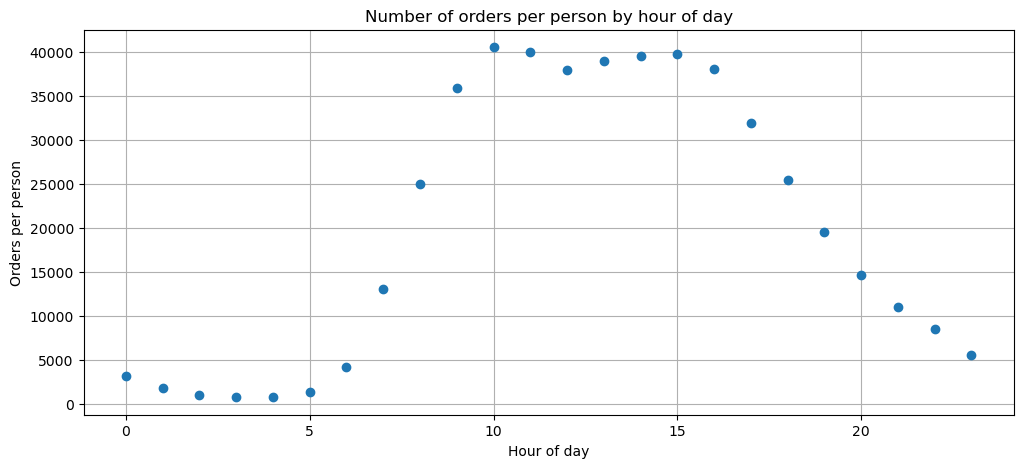

In [37]:
from matplotlib import pyplot as plt
orders_per_hour = df_orders.groupby('order_hour_of_day')['user_id'].count()
orders_per_hour.plot(xlabel="Hour of day",
                     ylabel='Orders per person',
                     title='Number of orders per person by hour of day',
                     style='o',
                     figsize=[12, 5],
                     grid=True)
plt.show()

**Remarks**

The number of orders increases greatly from 6am to 10am, maintaining a high order flow between 10am and 3pm, then the number gradually decreases.

### [A3] What day of the week do people buy groceries?

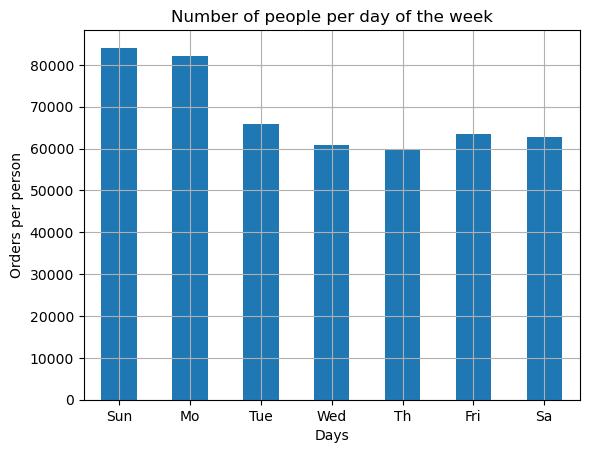

In [38]:
from matplotlib import pyplot as plt
orders_per_day = df_orders.groupby('order_dow')['user_id'].count()
orders_per_day.plot(kind='bar', xlabel="Days",
                    ylabel='Orders per person',
                    title='Number of people per day of the week',
                    rot=360,
                    grid=True)
plt.xticks(ticks = [0,1,2,3,4,5,6], labels=["Sun", "Mo", "Tue", "Wed","Th","Fri","Sa"])
plt.show()

**Remarks**

Sunday and Monday are the days with the most orders, well above the rest of the days, the day with the fewest orders is Thursday

### [A4] How long do people wait until they place another order?

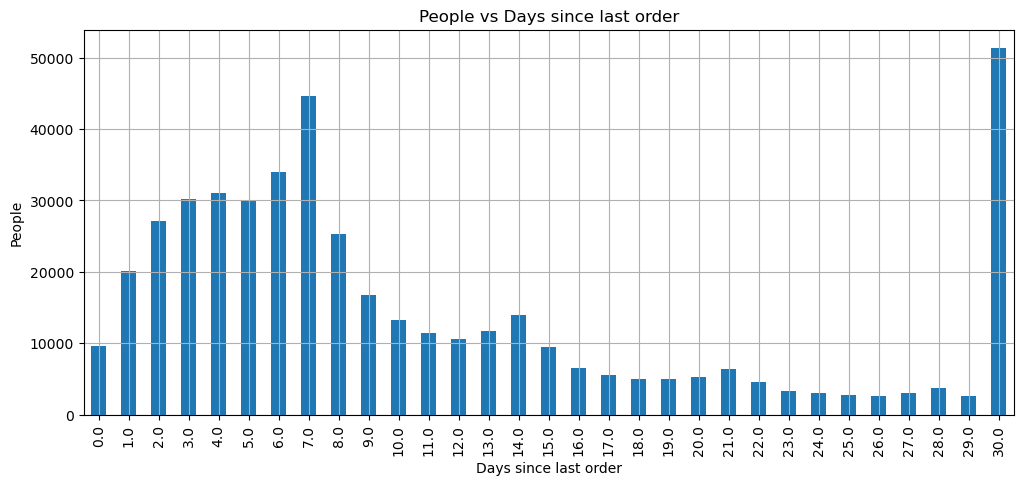

In [39]:
from matplotlib import pyplot as plt
last_order_days_transcurred = df_orders.groupby('days_since_prior_order')['user_id'].count()
last_order_days_transcurred.plot(kind='bar', 
                                 xlabel="Days since last order",
                                 ylabel='People', 
                                 title='People vs Days since last order',
                                 figsize=[12, 5],
                                 grid=True)
plt.show()

**Remarks**

- The minimum value in the table (0) shows that there are about 10,000 people who place orders less than 24 hours after their previous order.
- The maximum value (30) is also the most common, with most people waiting more than a month to place an order again.

## Analysis B

### [B1] Is there any difference between the `'order_hour_of_day'` distributions on Wednesdays and Saturdays?

In [40]:
#Filtering lines for orders on Wednesday and Saturday
df_orders_wed = df_orders[df_orders['order_dow'] == 3]
df_orders_sat = df_orders[df_orders['order_dow'] == 6]

In [41]:
# Group by hour of day and count number of order users for the day Wednesday
orders_per_hour_wed = df_orders_wed.groupby('order_hour_of_day')['user_id'].count()

In [42]:
# Group by hour of day and count number of order users for the day Saturday
orders_per_hour_sat = df_orders_sat.groupby('order_hour_of_day')['user_id'].count()

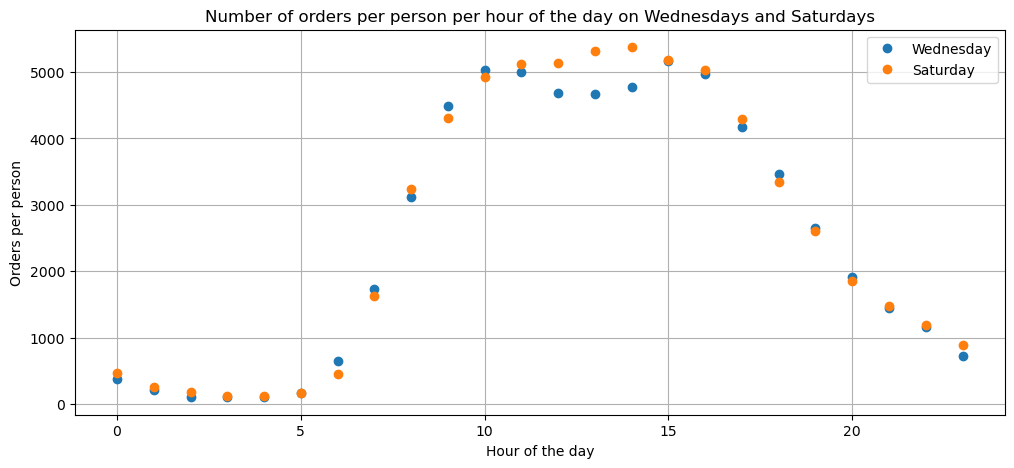

In [43]:
orders_per_hour_wed.plot(style='o')
orders_per_hour_sat.plot(xlabel="Hour of the day", 
                         ylabel='Orders per person', 
                         title='Number of orders per person per hour of the day on Wednesdays and Saturdays',
                         figsize=[12, 5],
                         style='o',
                         grid=True)
plt.legend(['Wednesday', 'Saturday'])
plt.show()

**Remarks**

Customers make almost the same number of orders on Wednesdays and Saturdays at almost the same time, except for the period between 12pm and 2pm. During that time period, orders on Saturday are greater than those on Wednesday.

### [B2] What is the distribution for the number of orders per customer?

In [44]:
orders_p_customer = df_orders.groupby('order_number')['user_id'].count()

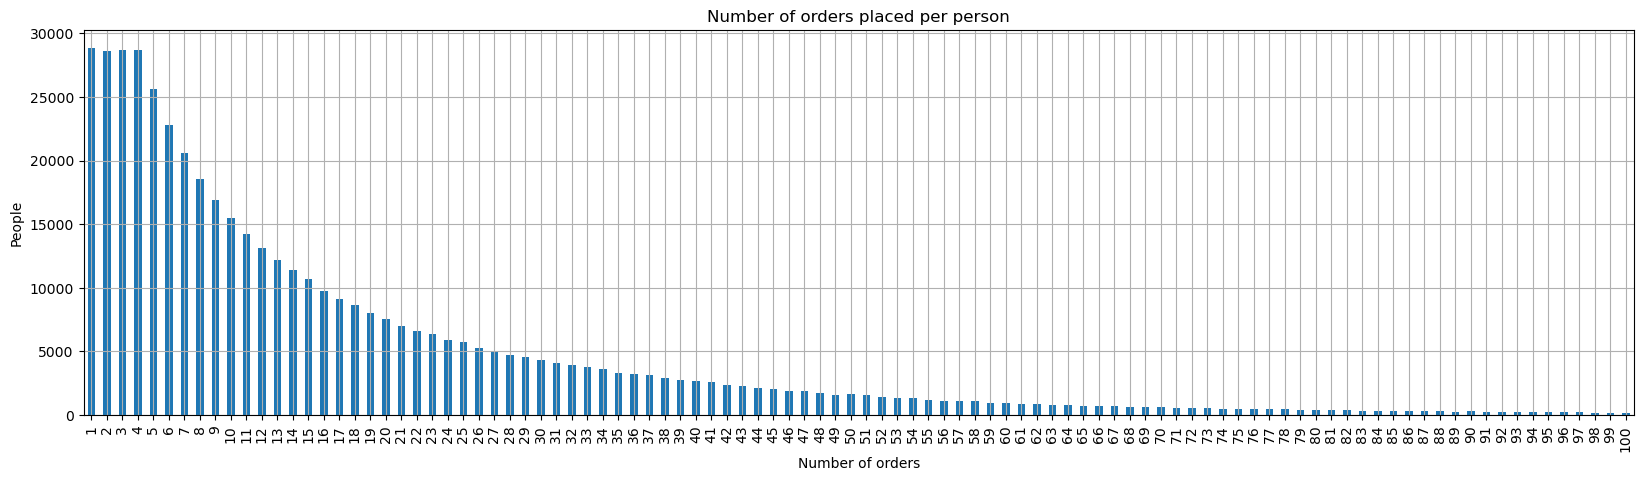

In [45]:
orders_p_customer.plot(kind='bar', 
                        xlabel="Number of orders", 
                        ylabel='People',
                        title='Number of orders placed per person', 
                        figsize=[20, 5],
                        grid=True)
plt.show()

**Remarks**

It is normal to see the graph reduce in relation to the number of orders; the vast majority of customers do not make more than 10 orders.

### [B3] What are the 20 most popular products (show their ID and name)?

In [46]:
#Grouping quantity of orders by product_id
product_orders = df_order_products.groupby('product_id')['order_id'].count()
#Sort descending
product_orders = product_orders.sort_values(ascending = False)
#Getting the top 20
product_orders = product_orders.iloc[:20]

In [47]:
#Merging with df_products to get the column with the names
twenty_popular = df_products.merge(product_orders, on='product_id')
#Narrowing down to see the columns we are interested in
twenty_popular = twenty_popular[['product_id', 'product_name','order_id']]

In [48]:
# Modifying the order_id column name to be more descriptive
new_names = {
  'order_id': 'Number of Orders'
}
twenty_popular = twenty_popular.rename(columns=new_names)

# Printing in descending order
print(twenty_popular.sort_values(by='Number of Orders', ascending=False))

    product_id              product_name  Number of Orders
7        24852                    Banana             66050
2        13176    Bag of Organic Bananas             53297
4        21137      Organic Strawberries             37039
5        21903      Organic Baby Spinach             33971
16       47209      Organic Hass Avocado             29773
18       47766           Organic Avocado             24689
17       47626               Large Lemon             21495
3        16797              Strawberries             20018
9        26209                     Limes             19690
10       27845        Organic Whole Milk             19600
11       27966       Organic Raspberries             19197
6        22935      Organic Yellow Onion             15898
8        24964            Organic Garlic             15292
15       45007          Organic Zucchini             14584
13       39275       Organic Blueberries             13879
19       49683            Cucumber Kirby             136

**Remarks**

Most of the products in the top orders are organic

# Analysis C

### [C1] How many items do people typically buy in one order? How is the distribution?

In [49]:
#Grouping by order_id
ordered_products = df_order_products.groupby('order_id')

In [50]:
#Getting the number of lines for each order_id
ordered_products = ordered_products.count()
print(ordered_products)

          product_id  add_to_cart_order  reordered
order_id                                          
4                 13                 13         13
9                 15                 15         15
11                 5                  5          5
19                 3                  3          3
20                 8                  8          8
...              ...                ...        ...
3421034           17                 17         17
3421053            9                  9          9
3421071            5                  5          5
3421077            4                  4          4
3421079            1                  1          1

[450046 rows x 3 columns]


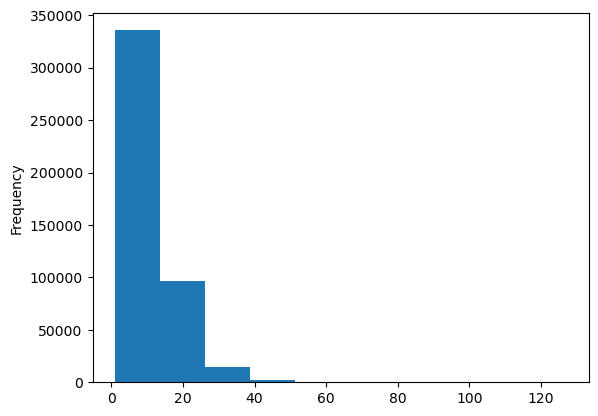

The average number of items purchased in a single order is:  10.098983215049127


In [51]:
ordered_products['product_id'].plot(kind='hist')
plt.show()
print("The average number of items purchased in a single order is: ", ordered_products['product_id'].mean())

**Remarks**

The vast majority of items included in a single order range from 1 to 20 items, with an average of 10 items.

### [C2] What are the top 20 most frequently reordered items?

In [52]:
#Grouping by sum of product_id
reordered_products = df_order_products.groupby('product_id').sum()
#Ordering from largest to smallest
reordered_products = reordered_products.sort_values(by = 'reordered',ascending = False)

In [53]:
#Getting the 20 most reordered
most_reordered = reordered_products.iloc[:20]
#Merging with df_products to get the column with the names
most_reordered = df_products.merge(most_reordered, on='product_id')
#Narrowing down to see the columns we are interested in
most_reordered = most_reordered[['product_id', 'product_name','reordered']]

In [54]:
# Modifying the reordered column name to be more descriptive
new_names = {
  'reordered': 'Times_Reordered'
}
most_reordered = most_reordered.rename(columns=new_names)

In [55]:
#Printing in descending order
print(most_reordered.sort_values(by='Times_Reordered',ascending = False))

    product_id              product_name  Times_Reordered
7        24852                    Banana            55763
2        13176    Bag of Organic Bananas            44450
4        21137      Organic Strawberries            28639
5        21903      Organic Baby Spinach            26233
15       47209      Organic Hass Avocado            23629
17       47766           Organic Avocado            18743
10       27845        Organic Whole Milk            16251
16       47626               Large Lemon            15044
11       27966       Organic Raspberries            14748
3        16797              Strawberries            13945
9        26209                     Limes            13327
6        22935      Organic Yellow Onion            11145
8        24964            Organic Garlic            10411
14       45007          Organic Zucchini            10076
19       49683            Cucumber Kirby             9538
12       28204        Organic Fuji Apple             8989
1         8277

**Remarks**

It is normal to find that many of the most reordered products coincide with the most ordered products.

### [C3] For each product, what is the proportion of times it is ordered and reordered?

In [56]:
#Grouping by sum of reordered product_ids
reordered_products_sum = df_order_products.groupby('product_id')['reordered'].sum()
#Grouping by product_id count in order_id
ordered_products_count = df_order_products.groupby('product_id')['order_id'].count()

In [57]:
#Concatenating series grouped in the same dataframe
group = pd.concat([reordered_products_sum, ordered_products_count], axis='columns')

In [58]:
#Creating new column with proportion
group['proportion'] = group['reordered'] / group['order_id']
print(group)

            reordered  order_id  proportion
product_id                                 
1                 158       280    0.564286
2                   0        11    0.000000
3                  31        42    0.738095
4                  25        49    0.510204
7                   1         2    0.500000
...               ...       ...         ...
49690               4         5    0.800000
49691              31        72    0.430556
49692               5        12    0.416667
49693              11        25    0.440000
49694               3         9    0.333333

[45573 rows x 3 columns]


**Remarks**

The ratio "number of repeat orders/total orders" can give us a very good idea of ​​the products with good quality that customers enjoy continuing to buy.

### [C4] For each customer, what proportion of your products had already been ordered?

In [59]:
#Grouping by sum of reordered and quantity of products for each order
agg_dict = {'reordered': 'sum', 'product_id': 'count'}
group = df_order_products.groupby('order_id')
group = group.agg(agg_dict)

In [60]:
#Merging reordered with df_orders by order_id
mix = df_orders.merge(group, on='order_id')
#Removing unnecessary columns
mix = mix[['user_id','reordered', 'product_id']]
#Grouping by sum of products and reordered for each user
mix = mix.groupby('user_id').sum()
#Adding column with proportion and printing
mix['proportion'] = mix['reordered'] / mix['product_id']
print(mix)

         reordered  product_id  proportion
user_id                                   
2                1          26    0.038462
4                0           2    0.000000
5                8          12    0.666667
6                0           4    0.000000
7               13          14    0.928571
...            ...         ...         ...
206203           6          27    0.222222
206206          15          21    0.714286
206207          41          46    0.891304
206208          87         125    0.696000
206209           8          25    0.320000

[149626 rows x 3 columns]


**Remarks**

The "repurchased products/purchased products" ratio for each customer can give us an idea of ​​which customers tend to repurchase products, information that can be valuable to the customer, for example, to offer them promotions or reward them for it.

### [C5] What are the top 20 items people put first in their carts?

In [61]:
#Filtering by products ordered first
first_articles = df_order_products[df_order_products['add_to_cart_order'] == 1]
#Grouping by sum of product_id added first
first_articles = first_articles.groupby('product_id').sum()
#Ordering from largest to smallest
first_articles = first_articles.sort_values(by = 'add_to_cart_order',ascending = False)

In [62]:
#Getting the 20 most ordered as first option
most_firsto = first_articles.iloc[:20]
#Merging with df_products to get the column with the names
most_firsto = df_products.merge(most_firsto, on='product_id')
#Narrowing down to see the columns we are interested in
most_firsto = most_firsto[['product_id', 'product_name','add_to_cart_order']]

In [63]:
#Modifying the name of order_id to be more explanatory
new_names = {
'add_to_cart_order' : 'Times sorted first'
}
most_firsto = most_firsto. rename(columns = new_names)
#Printing in descending order
print(most_firsto. sort_values(by='Times sorted first',ascending = False))

    product_id                 product_name  Times sorted first
8        24852                       Banana               15562
3        13176       Bag of Organic Bananas               11026
11       27845           Organic Whole Milk                4363
6        21137         Organic Strawberries                3946
16       47209         Organic Hass Avocado                3390
7        21903         Organic Baby Spinach                3336
18       47766              Organic Avocado                3044
5        19660                 Spring Water                2336
4        16797                 Strawberries                2308
12       27966          Organic Raspberries                2024
15       44632   Sparkling Water Grapefruit                1914
19       49235          Organic Half & Half                1797
17       47626                  Large Lemon                1737
0          196                         Soda                1733
13       38689     Organic Reduced Fat M

**Remarks**

In this case there was not much similarity with the reordered or more ordered products, however the most ordered products occupied the majority of the first positions in those ordered first.

# Conclusion of the Exploratory Data Analysis
The analysis provides key insights into customer behavior, order patterns, and potential system issues.
### Customer Ordering Behavior
- **Peak Order Times:** Orders significantly increase from 6 AM to 3 PM, with the highest volume between 10 AM and 3 PM.
- **Popular Shopping Days:** Sunday and Monday have the highest number of orders, while Thursday has the fewest.
- **Order Frequency:** Most customers place orders once a month (30 days apart), but around 10,000 customers reorder within 24 hours of their last purchase.
- **Cart Size:** Customers typically purchase 1 to 20 items per order, with an average of 10 items per order.
### Product Preferences & Customer Loyalty
- **Most Ordered Products:** Organic products dominate the top orders.
- **Repeat Purchases:** The ratio of repurchased products to total purchases can help identify high-quality products that drive customer loyalty.
- **Customer Segmentation:** The "repurchased products/purchased products" ratio can be used to segment customers and offer personalized promotions or rewards.
### System & Data Quality Issues
- **Duplicate Orders:** A system failure likely occurred on Wednesdays at 2:00 AM, leading to 15 duplicate orders—potentially due to a backup issue.
- **Missing Product Names:** All missing values for product_name belong to aisle 100 and department 21, where the system automatically assigns the word "missing."
- **Cart Size Limitation:** Orders with more than 64 items have missing "add_to_cart" values, suggesting a system bug that fails to record numbers beyond this threshold.
### Business Implications
- **Optimize Promotions & Inventory:** Focus marketing efforts on peak shopping times and popular products.
- **Customer Retention Strategy:** Leverage repurchase data to offer targeted promotions and reward loyal customers.
- **Improve System Reliability:** Investigate and resolve system bugs related to duplicate orders and missing cart data to ensure a seamless customer experience.